In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#Univariate Analysis

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
columns =['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']


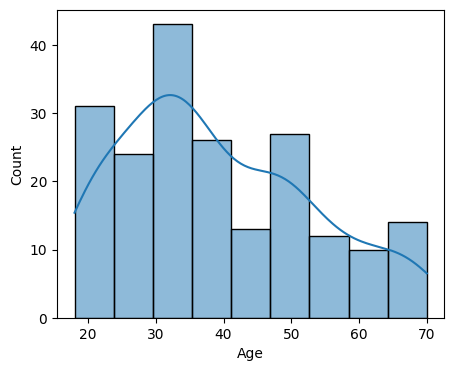

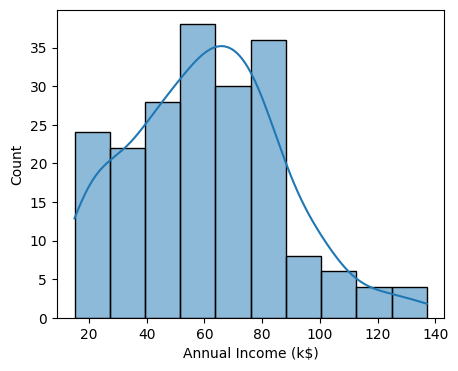

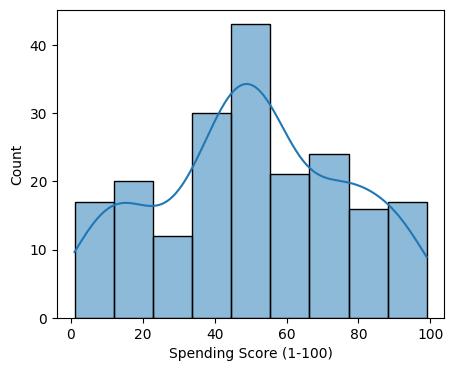

In [ ]:
for i in columns:
    plt.figure(figsize=(5,4))
    sns.histplot(df[i], kde=True);

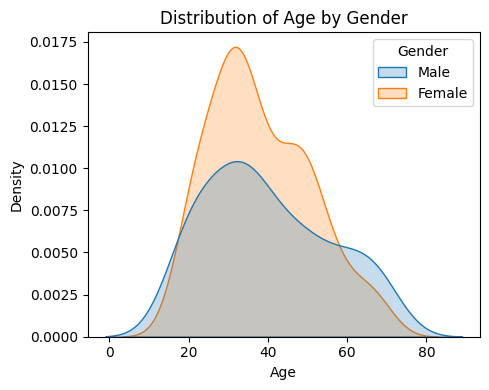

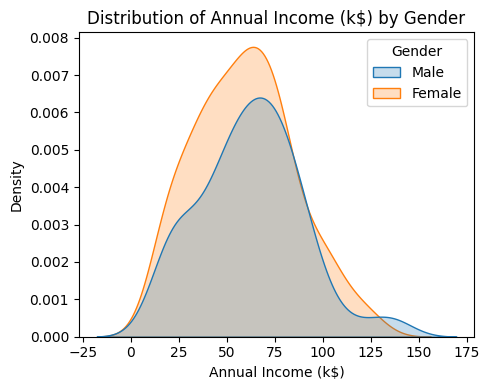

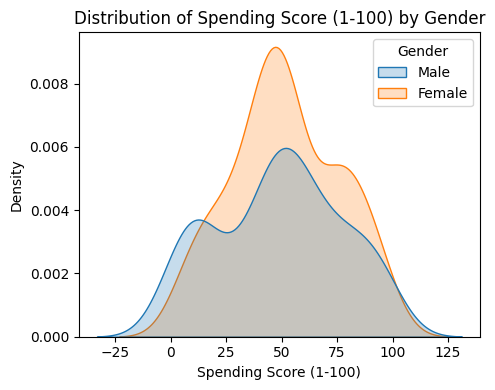

In [ ]:
for i in columns:
    plt.figure(figsize=(5,4))
    sns.kdeplot(data=df, x=i, fill=True, hue="Gender");
    plt.title(f'Distribution of {i} by Gender')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

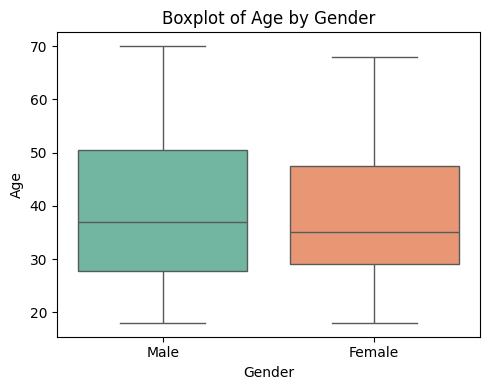

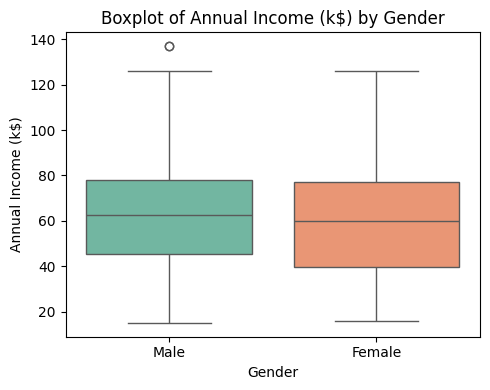

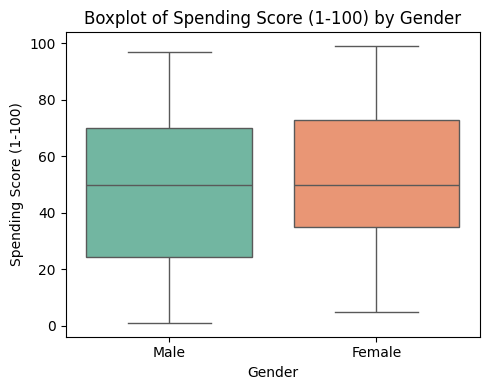

In [ ]:
for i in columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df, x='Gender', y=i, palette = 'Set2');
    plt.title(f'Boxplot of {i} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(i)
    plt.tight_layout()
    plt.show()

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


#Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

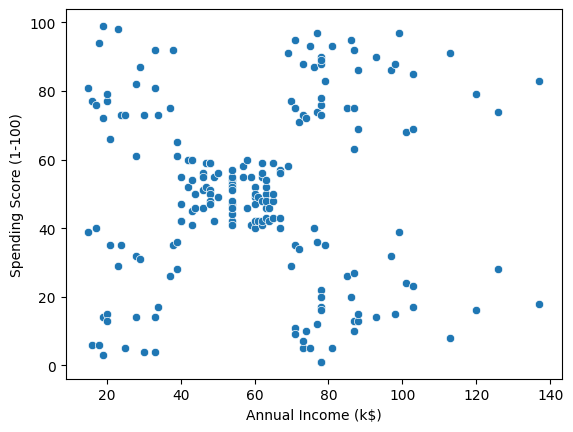

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)',
       y='Spending Score (1-100)')

In [ ]:
#df= df.drop("CustomerID", axis =1)

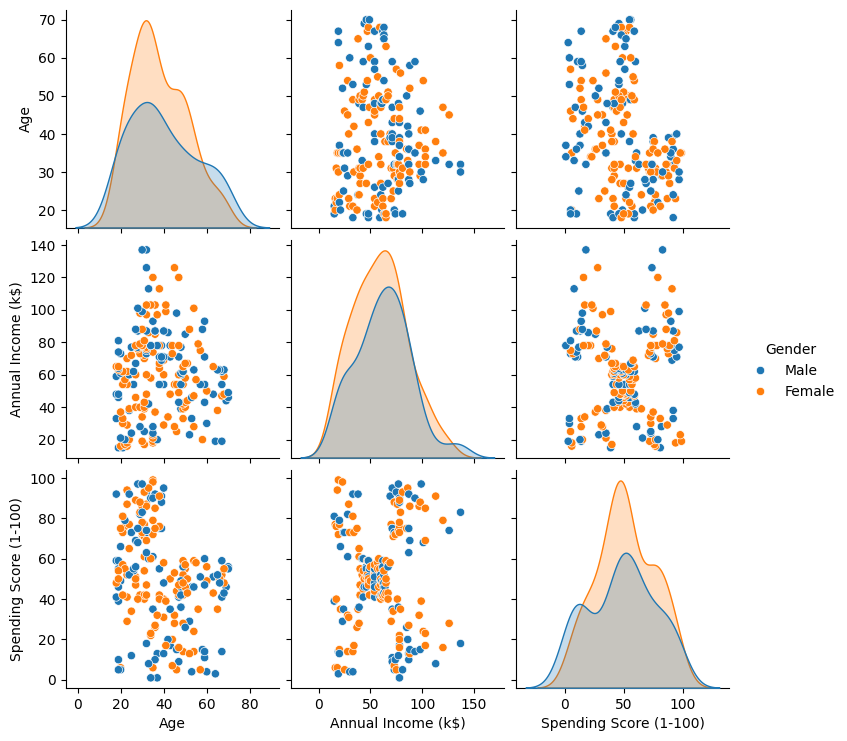

In [ ]:
sns.pairplot(df, hue='Gender')

In [ ]:
df.groupby(["Gender"])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

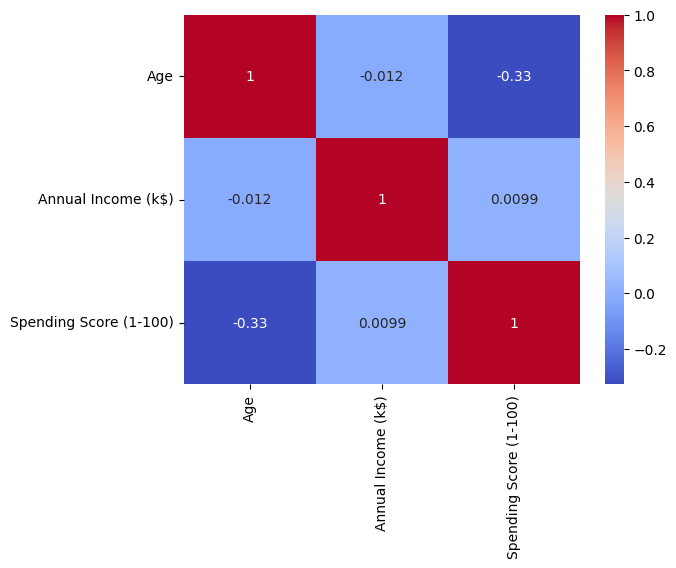

In [ ]:
df_numeric = df.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")

In [ ]:
##Clustering

#Clustering



##Univarte

In [ ]:
intertia_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

Text(0.5, 0, 'Number of clusters')

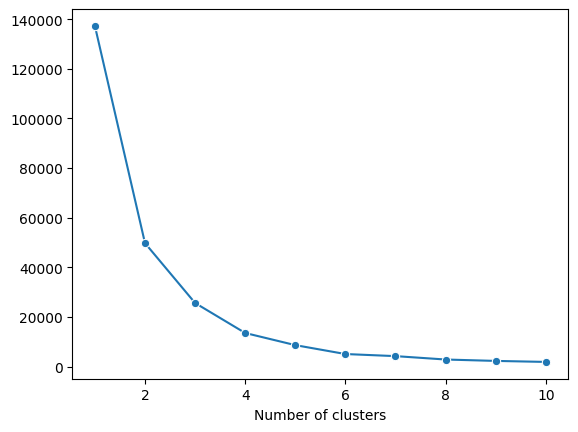

In [ ]:
sns.lineplot(x=list(range(1,11)), y=intertia_scores, marker='o')
plt.xlabel('Number of clusters')

In [ ]:
clustering_uni= KMeans(n_clusters=3, init='k-means++', random_state=42)
clustering_uni.fit(df[['Annual Income (k$)']])
df["Annual Income Cluster"] = clustering_uni.labels_

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [ ]:
df.groupby(["Annual Income Cluster"])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Annual Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


##Bivariate Clustering

In [ ]:
clustering_bi= kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
clustering_bi.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df["Annual Income and Spending Score Cluster"] = clustering_bi.labels_



In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income Cluster,Annual Income and Spending Score Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,2
2,Female,20,16,6,2,4
3,Female,23,16,77,2,2
4,Female,31,17,40,2,4


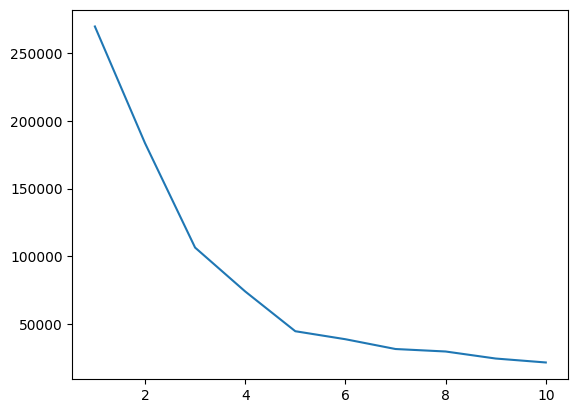

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

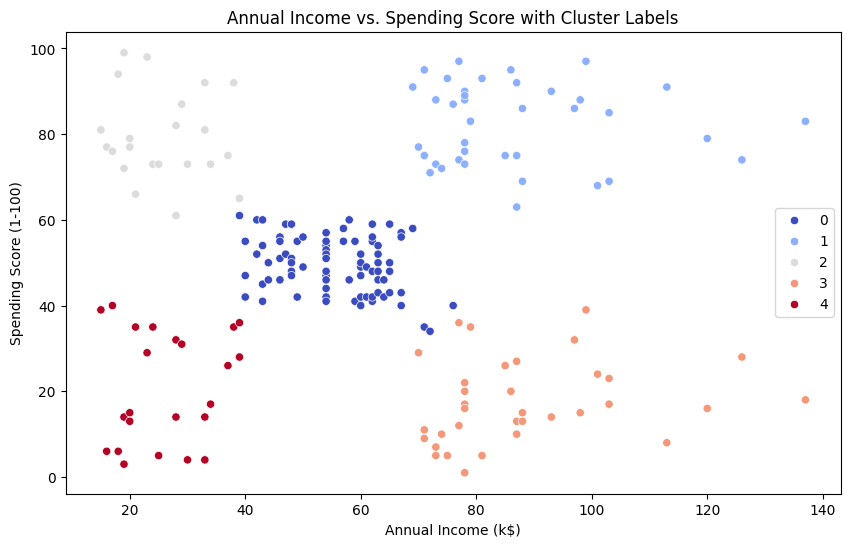

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Annual Income and Spending Score Cluster', palette='coolwarm')
plt.title('Annual Income vs. Spending Score with Cluster Labels')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
pd.crosstab(df["Annual Income and Spending Score Cluster"],df['Gender'],normalize='index')

Gender,Female,Male
Annual Income and Spending Score Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


In [ ]:
df.groupby("Annual Income and Spending Score Cluster")[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Annual Income and Spending Score Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


##mulivariate clustering

In [ ]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
X = df[features]

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)


In [ ]:
inertia_scores3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia_scores3.append(kmeans.inertia_)


Text(0.5, 1.0, 'Multivariate Clustering')

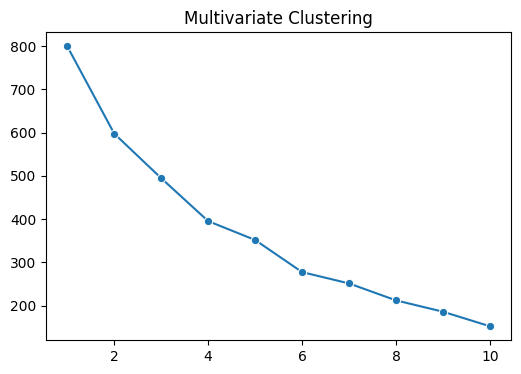

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(x=range(1, 11), y=inertia_scores3, marker='o')
plt.title("Multivariate Clustering")

In [ ]:
kmeans_mv = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Multivariate Cluster'] = kmeans_mv.fit_predict(X_scaled)

In [ ]:
df.groupby('Multivariate Cluster')[features].mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Multivariate Cluster,,,,
0,56.470588,46.098039,39.313725,0.509804
1,39.500000,85.150000,14.050000,1.000000
2,28.690476,60.904762,70.238095,1.000000
3,37.897959,82.122449,54.448980,0.000000
4,27.315789,38.842105,56.210526,0.000000
